In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
data = {
    "A": 1.0,
    "B": pd.Timestamp("20150101"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3,3,3,3],dtype="int32"),
    "E": pd.Categorical(["test","train","test","train"]),
    "F": "foo"
}

In [86]:
df = pd.DataFrame(data)
print(df)

     A          B    C  D      E    F
0  1.0 2015-01-01  1.0  3   test  foo
1  1.0 2015-01-01  1.0  3  train  foo
2  1.0 2015-01-01  1.0  3   test  foo
3  1.0 2015-01-01  1.0  3  train  foo


In [87]:
df = pd.read_csv("weather.csv")
df["Precipitation (inches)"] = df["Precipitation (inches)"].replace("T","0.0")
df["Precipitation (inches)"] = pd.to_numeric(df["Precipitation (inches)"])
df["Snow (inches)"] = df["Snow (inches)"].replace("T","0.0")
df["Snow (inches)"] = pd.to_numeric(df["Snow (inches)"])
df["Snow Depth (inches)"] = df["Snow Depth (inches)"].replace("T","0.0")
df["Snow Depth (inches)"] = pd.to_numeric(df["Snow Depth (inches)"])
df["Date"] = pd.to_datetime(df["Date"])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1437 non-null   datetime64[ns]
 1   Maximum Temperature degrees (F)  1437 non-null   float64       
 2   Minimum Temperature degrees (F)  1437 non-null   float64       
 3   Precipitation (inches)           1437 non-null   float64       
 4   Snow (inches)                    1437 non-null   float64       
 5   Snow Depth (inches)              1437 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 67.5 KB
None


In [88]:
print(df.tail())

           Date  Maximum Temperature degrees (F)  \
1432 2023-12-03                             37.0   
1433 2023-12-04                             37.0   
1434 2023-12-05                             34.0   
1435 2023-12-06                             47.0   
1436 2023-12-07                             51.0   

      Minimum Temperature degrees (F)  Precipitation (inches)  Snow (inches)  \
1432                             31.0                    0.00            0.0   
1433                             26.0                    0.03            0.6   
1434                             24.0                    0.03            0.3   
1435                             22.0                    0.00            0.0   
1436                             30.0                    0.00            0.0   

      Snow Depth (inches)  
1432                  0.0  
1433                  0.0  
1434                  1.0  
1435                  0.0  
1436                  0.0  


In [89]:
print(df.describe())

                      Date  Maximum Temperature degrees (F)  \
count                 1437                      1437.000000   
mean   2021-12-19 00:00:00                        57.384830   
min    2020-01-01 00:00:00                        -4.000000   
25%    2020-12-25 00:00:00                        37.000000   
50%    2021-12-19 00:00:00                        59.000000   
75%    2022-12-13 00:00:00                        79.000000   
max    2023-12-07 00:00:00                       101.000000   
std                    NaN                        24.165317   

       Minimum Temperature degrees (F)  Precipitation (inches)  Snow (inches)  \
count                      1437.000000             1437.000000    1437.000000   
mean                         39.885177                0.073925       0.152540   
min                         -19.000000                0.000000       0.000000   
25%                          24.000000                0.000000       0.000000   
50%                        

In [90]:
rain_data = df["Precipitation (inches)"]
print(rain_data)

0       0.00
1       0.00
2       0.00
3       0.00
4       0.01
        ... 
1432    0.00
1433    0.03
1434    0.03
1435    0.00
1436    0.00
Name: Precipitation (inches), Length: 1437, dtype: float64


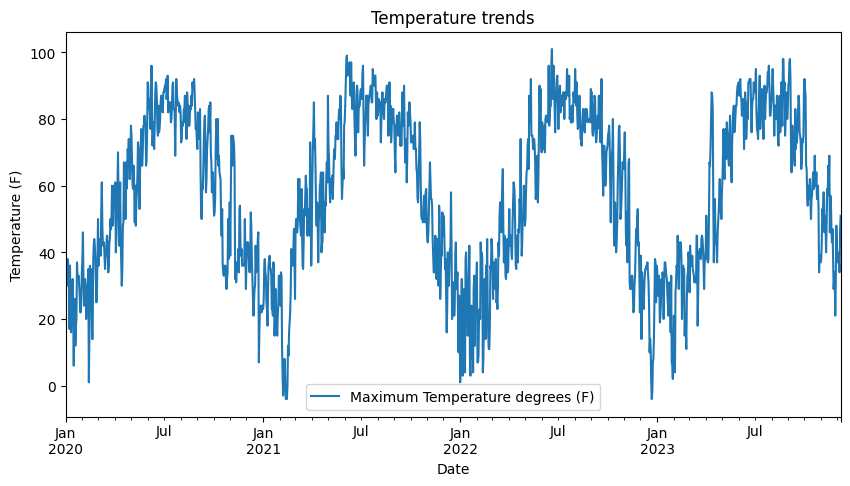

In [91]:
df.plot(x="Date",y="Maximum Temperature degrees (F)", figsize=(10,5))

plt.title("Temperature trends")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()


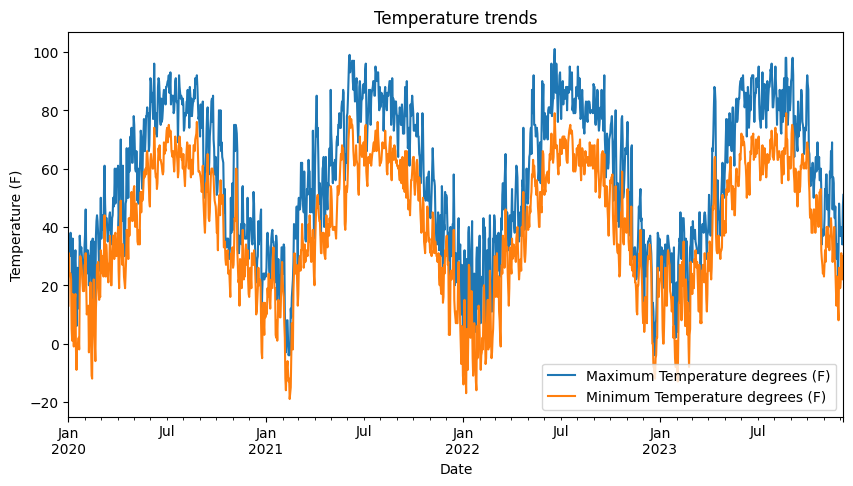

In [92]:
df.plot(x="Date",y=["Maximum Temperature degrees (F)", "Minimum Temperature degrees (F)"], figsize=(10,5))

plt.title("Temperature trends")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()


array([[<Axes: title={'center': 'Precipitation (inches)'}>]], dtype=object)

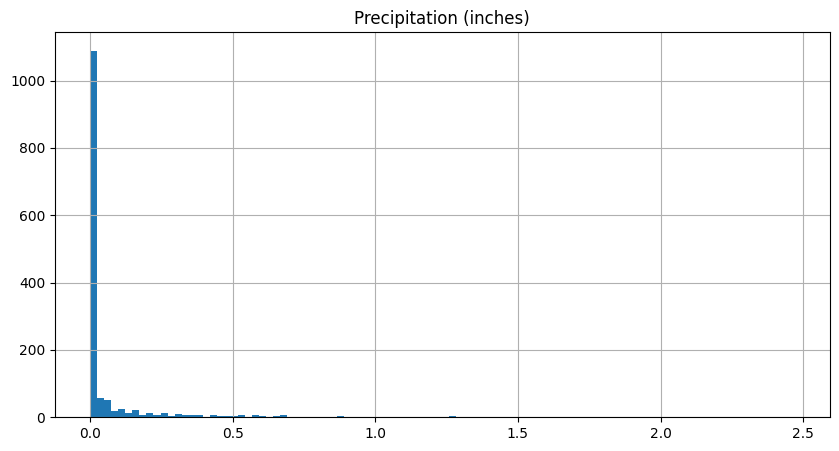

In [93]:
df.hist("Precipitation (inches)",bins=100, figsize=(10,5))

array([[<Axes: title={'center': 'Precipitation (inches)'}>]], dtype=object)

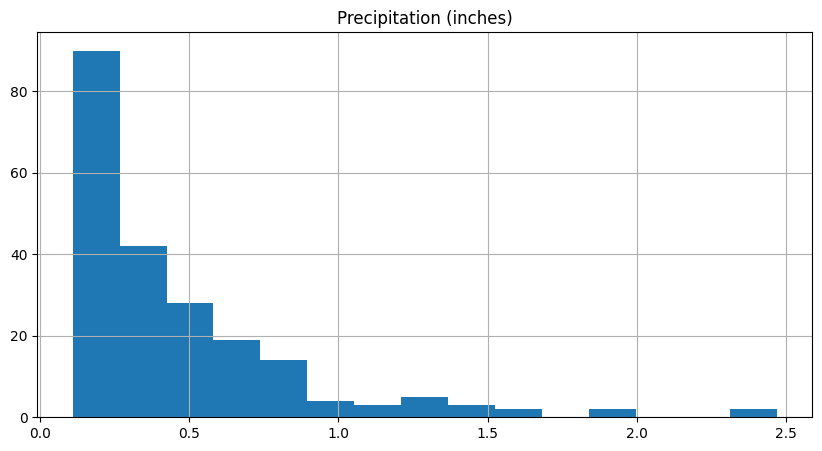

In [94]:
high_precipitation = df[df["Precipitation (inches)"] > 0.1]
high_precipitation.hist("Precipitation (inches)",bins=15, figsize=(10,5))

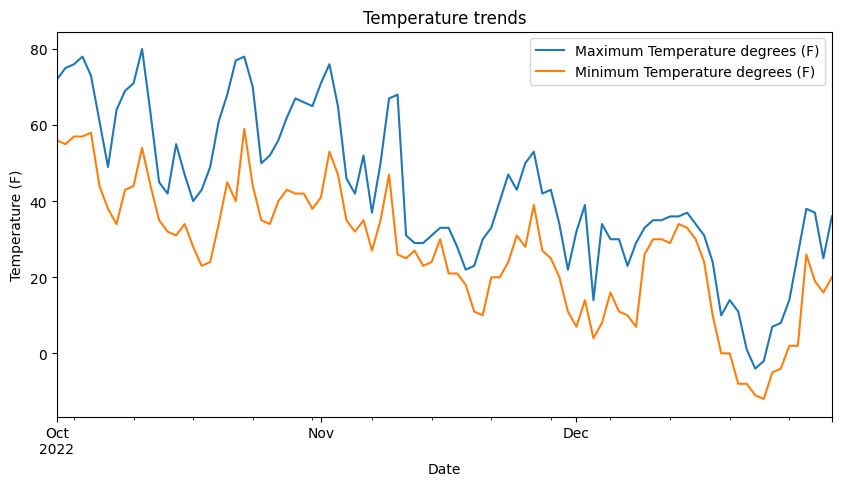

In [95]:
# Oct-Dec, 2020
end_of_2020 = df[ (df["Date"].dt.year == 2022) & (df["Date"].dt.month >= 10) & (df["Date"].dt.month <= 12)]
end_of_2020.plot(x="Date",y=["Maximum Temperature degrees (F)", "Minimum Temperature degrees (F)"], figsize=(10,5))

plt.title("Temperature trends")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()

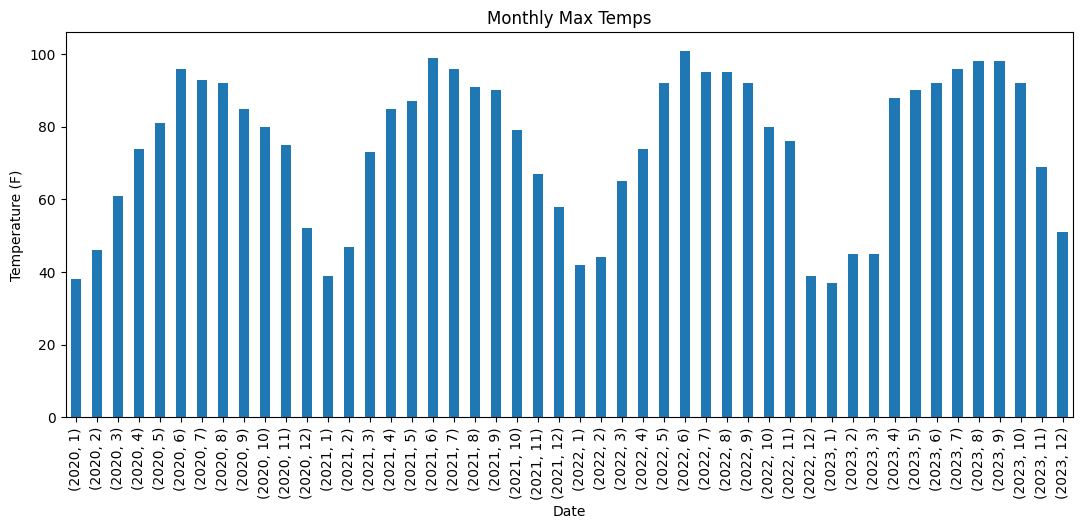

In [97]:
#Maximum temperature in January 2022
# Challenge - using list comprehensions, or another method get the maximum temperature of every month in 2022
max(df["Maximum Temperature degrees (F)"][ (df["Date"].dt.year == 2022) & (df["Date"].dt.month == 1)])

# List Comprehension
monthly_max_temps = [max(df["Maximum Temperature degrees (F)"][ (df["Date"].dt.year == 2022) & (df["Date"].dt.month == month)]) for month in range(1,13)]

# Pandas way
monthly_max_temps_groupby = df.groupby([df["Date"].dt.year, df["Date"].dt.month])["Maximum Temperature degrees (F)"].max()
monthly_max_temps_groupby.plot(kind="bar", x="Date", y="Temperature (F)", figsize=(13, 5))
plt.title("Monthly Max Temps")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()


1. Snow totals per month
2. Snow depth, all data
3. days with precip, 2021
4. high/low variance over highs and lows, March 2022

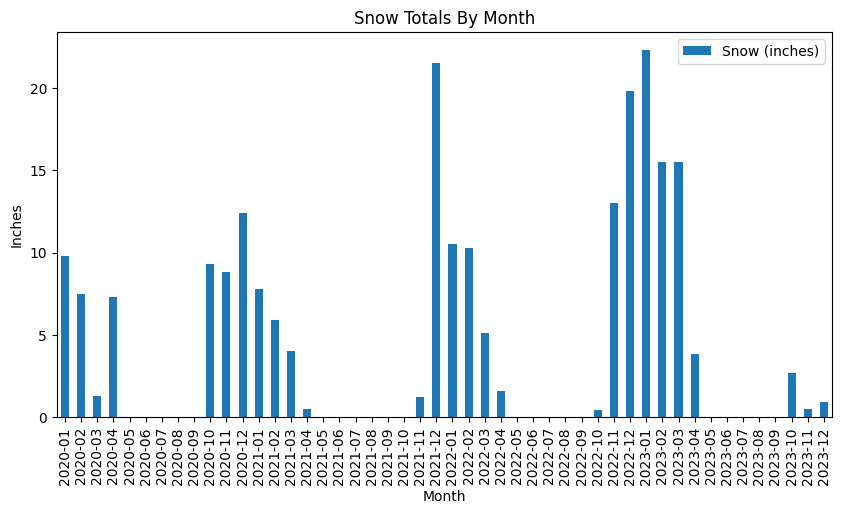

In [ ]:
# 1.
df1 = df.copy()
# Add month-year column
df1["Month"] = df1['Date'].dt.to_period("M")
# Group by snow sum per month column value
monthly_snows = df1.groupby('Month')[["Snow (inches)"]].sum()
plot1 = monthly_snows.plot(kind='bar', figsize=(10,5))

plt.title("Snow Totals By Month")
plt.xlabel("Month")
plt.ylabel("Inches")
plt.show()

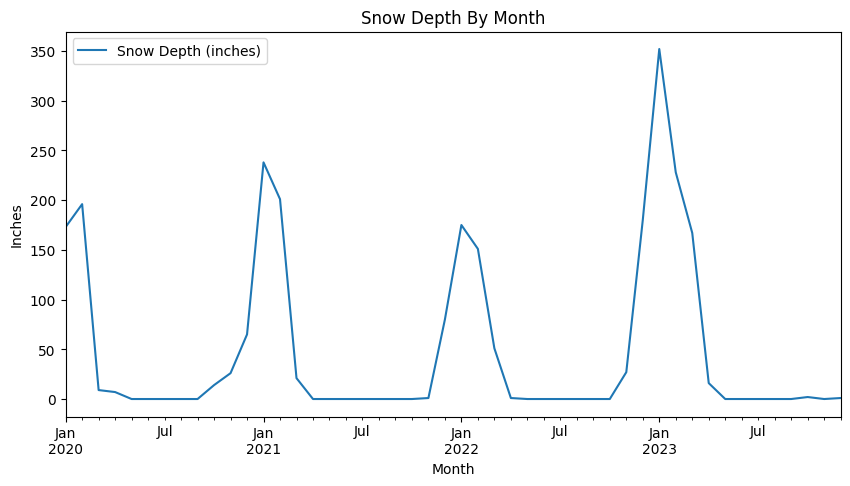

In [ ]:
# 2.
snow_depths = df1.groupby('Month')[["Snow Depth (inches)"]].sum()
plot2 = snow_depths.plot(kind='line', figsize=(10,5))

plt.title("Snow Depth By Month")
plt.xlabel("Month")
plt.ylabel("Inches")
plt.show()


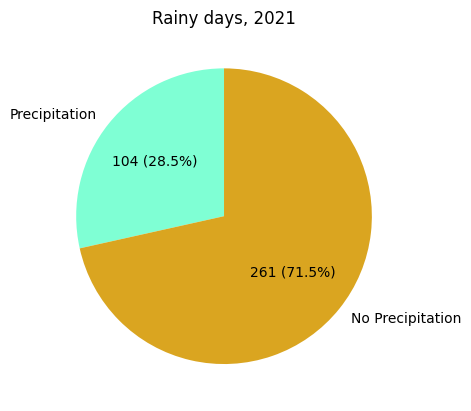

In [112]:
# 3.
days_rained = (df[df['Date'].dt.year == 2021]['Precipitation (inches)'] != 0).sum()
days_dry = (df[df['Date'].dt.year == 2021]['Precipitation (inches)'] == 0).sum()

labels = ['Precipitation', 'No Precipitation']
colors = ['aquamarine', 'goldenrod']
values = [days_rained, days_dry]

plt.pie([days_rained, days_dry], labels=labels, colors=colors, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90)
plt.title('Rainy days, 2021')
plt.show()

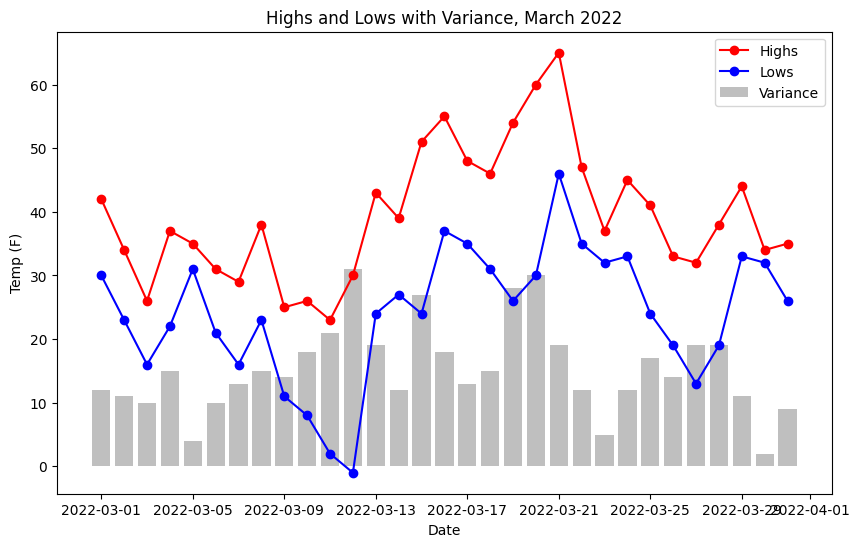

In [118]:
# 4.
plt.figure(figsize=(10,6))
m2 = df[(df['Date'] >= '2022-03-01') & (df['Date'] <= '2022-03-31')]

plt.plot(m2['Date'], m2['Maximum Temperature degrees (F)'], label='Highs', color='red', marker='o')
plt.plot(m2['Date'], m2['Minimum Temperature degrees (F)'], label='Lows', color='blue', marker='o')
plt.bar(m2['Date'], m2['Maximum Temperature degrees (F)'] - m2['Minimum Temperature degrees (F)'], alpha=0.5, color='gray', label='Variance')

plt.xlabel("Date")
plt.ylabel("Temp (F)")
plt.title("Highs and Lows with Variance, March 2022")

plt.legend()

plt.show()